In [50]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import itertools

In [2]:
rawData = pd.read_csv("Kepler_Data.csv")
rawData = rawData.drop("koi_disposition", axis = 1)
rawData

,rowid,kepid,kepoi_name,kepler_name,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,0.000,0,1,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,0.000,0,0,0,1,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [3]:
le = LabelEncoder()
y = le.fit_transform(rawData['koi_pdisposition'])
X = rawData.drop("koi_pdisposition", axis = 1)
numericCols = rawData.select_dtypes(np.number).columns.to_list()
X = X[numericCols]
ss = StandardScaler()

In [4]:
# find numeric columns
X = X.fillna(0)
X[numericCols] = ss.fit_transform(X)
X = X.drop(["rowid", "kepid"], axis = 1)
X

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1.262249,-0.481497,-0.549001,-0.492014,-0.369333,-0.049588,-0.250671,0.250671,0.064131,-0.322485,...,0.921568,0.345862,-0.384691,0.451730,-0.122305,-0.262934,0.148616,-0.026421,1.202764,0.778117
1,1.196495,-0.481497,-0.549001,-0.492014,-0.369333,-0.015924,-0.223326,0.223326,-0.054029,-0.262414,...,0.921568,0.345862,-0.384691,0.451730,-0.122305,-0.262934,0.148616,-0.026421,1.202764,0.778117
2,-0.858873,-0.481497,1.821492,-0.492014,-0.369333,-0.041787,-0.252262,0.252262,0.142339,-0.392228,...,-0.276578,0.428972,-0.536056,-0.448239,-0.132108,-0.122447,0.140583,1.037397,1.200675,0.842009
3,-0.858873,-0.481497,1.821492,-0.492014,-0.369333,-0.055395,-0.254085,0.254085,0.060727,-0.412812,...,-0.251354,0.450559,-0.467942,-0.358242,-0.144902,-0.157569,0.145781,-1.369071,1.242630,0.957590
4,1.262249,-0.481497,-0.549001,-0.492014,-0.369333,-0.054804,-0.253650,0.253650,0.079692,-0.367979,...,-0.718000,0.314561,-0.339282,-0.830726,-0.102533,-0.011595,0.114591,-0.693454,1.226243,0.894416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,-0.858873,-0.481497,-0.549001,-0.492014,2.707584,-0.050261,-0.231189,0.231189,-0.503084,0.275571,...,0.026112,0.161293,0.879202,-0.594484,-0.095555,-0.034643,0.069698,1.403373,0.878331,0.154265
9560,-0.858873,-0.481497,1.821492,2.032462,-0.369333,-0.056301,-0.254103,0.254103,-0.507663,-0.410382,...,-0.150457,0.412782,-0.604170,-0.673232,-0.126293,-0.118057,0.140110,1.075986,0.911785,-0.130021
9561,0.195325,-0.481497,-0.549001,-0.492014,-0.369333,-0.055393,-0.251906,0.251906,-0.488578,-0.078227,...,-0.831508,0.321037,-0.445237,-0.988221,-0.105025,-0.003912,0.123570,-1.164565,0.931057,0.354558
9562,-0.814329,-0.481497,-0.549001,2.032462,-0.369333,-0.056186,-0.253815,0.253815,-0.500645,-0.292008,...,-1.033301,0.324275,-0.445237,-0.988221,-0.103364,-0.003912,0.123570,0.441575,0.934684,0.805397


In [5]:
RF = RandomForestClassifier()
RF.fit(X, y)

RandomForestClassifier()

In [6]:
features = pd.DataFrame(RF.feature_importances_, X.columns)
features.sort_values(by=0)
features

,0
koi_score,0.351176
koi_fpflag_nt,0.129025
koi_fpflag_ss,0.063413
koi_fpflag_co,0.092709
koi_fpflag_ec,0.034944
koi_period,0.013618
koi_period_err1,0.013922
koi_period_err2,0.020438
koi_time0bk,0.005466
koi_time0bk_err1,0.003834


In [7]:
X = X.drop(columns = ["koi_period_err1", "koi_period_err2", "koi_time0bk_err1", "koi_time0bk_err2", "koi_impact_err1", "koi_impact_err2", "koi_duration_err1", "koi_duration_err2", "koi_depth_err1", "koi_depth_err2", "koi_prad_err1", "koi_prad_err2", "koi_teq_err1", "koi_teq_err2", "koi_insol_err1", "koi_insol_err2", "koi_steff_err1", "koi_steff_err2", "koi_slogg_err1", "koi_slogg_err2", "koi_srad_err1", "koi_srad_err2"])
X
# drop flag columns?

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1.262249,-0.481497,-0.549001,-0.492014,-0.369333,-0.049588,0.064131,-0.170709,-0.411686,-0.275683,...,-0.290351,-0.047232,-0.273919,-0.286874,-0.026253,0.345862,-0.122305,-0.026421,1.202764,0.778117
1,1.196495,-0.481497,-0.549001,-0.492014,-0.369333,-0.015924,-0.054029,-0.036868,-0.172241,-0.272477,...,-0.694916,-0.047772,-0.286706,1.157159,-0.026253,0.345862,-0.122305,-0.026421,1.202764,0.778117
2,-0.858873,-0.481497,1.821492,-0.492014,-0.369333,-0.041787,0.142339,0.079634,-0.593305,-0.149267,...,-0.469516,-0.047579,-0.222135,-0.286874,0.270398,0.428972,-0.132108,1.037397,1.200675,0.842009
3,-0.858873,-0.481497,1.821492,-0.492014,-0.369333,-0.055395,0.060727,0.173018,-0.496846,-0.183303,...,0.405501,-0.042131,0.326776,-0.286874,0.234621,0.450559,-0.144902,-1.369071,1.242630,0.957590
4,1.262249,-0.481497,-0.549001,-0.492014,-0.369333,-0.054804,0.079692,-0.001887,-0.613039,-0.275838,...,0.418216,-0.041912,-0.267398,-0.286874,0.403072,0.314561,-0.102533,-0.693454,1.226243,0.894416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,-0.858873,-0.481497,-0.549001,-0.492014,2.707584,-0.050261,-0.503084,0.017580,-0.126036,-0.282219,...,-0.133148,-0.046703,-0.308954,-0.286874,0.110147,0.161293,-0.095555,1.403373,0.878331,0.154265
9560,-0.858873,-0.481497,1.821492,2.032462,-0.369333,-0.056301,-0.507663,0.165718,-0.370797,-0.263758,...,1.206541,-0.019074,0.259904,-0.286874,0.110147,0.412782,-0.126293,1.075986,0.911785,-0.130021
9561,0.195325,-0.481497,-0.549001,-0.492014,-0.369333,-0.055393,-0.488578,-0.202040,-0.387502,-0.282705,...,0.651708,-0.037697,-0.306141,-0.286874,0.468663,0.321037,-0.105025,-1.164565,0.931057,0.354558
9562,-0.814329,-0.481497,-0.549001,2.032462,-0.369333,-0.056186,-0.500645,-0.170405,-0.735041,-0.282023,...,1.356808,-0.011324,-0.303967,-0.286874,0.508912,0.324275,-0.103364,0.441575,0.934684,0.805397


In [8]:
le = LabelEncoder()
y # candidate or false positive

array([0, 0, 1, ..., 0, 1, 1])

In [9]:
#X = rawData[["koi_score", "koi"]]

In [10]:
train, test, target, target_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% training, 20% test

### Using Cleaned Data

In [31]:
rawData = pd.read_csv("cleanData2.csv")

In [32]:
rawData = rawData.drop("Unnamed: 0", axis = 1)
rawData

,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,-1.061708,1.088639,-0.481497,-0.549001,-0.492014,-0.369333,-0.049588,0.064131,-0.175923,-0.411686,...,-0.341451,-0.048067,-0.281610,-0.366652,-0.316037,0.362574,-0.130852,-0.026421,1.202764,0.781300
1,-1.061708,1.023635,-0.481497,-0.549001,-0.492014,-0.369333,-0.015924,-0.054029,-0.044527,-0.172241,...,-0.750184,-0.048598,-0.294177,1.138156,-0.316037,0.362574,-0.130852,-0.026421,1.202764,0.781300
2,0.941878,-1.008242,-0.481497,1.821492,-0.492014,-0.369333,-0.041787,0.142339,0.069847,-0.593305,...,-0.522461,-0.048408,-0.230716,-0.366652,0.183451,0.540575,-0.140482,1.037397,1.200675,0.845542
3,0.941878,-1.008242,-0.481497,1.821492,-0.492014,-0.369333,-0.055395,0.060727,0.161526,-0.496846,...,0.361570,-0.043052,0.308766,-0.366652,0.123211,0.586809,-0.153049,-1.369071,1.242630,0.961756
4,-1.061708,1.088639,-0.481497,-0.549001,-0.492014,-0.369333,-0.054804,0.079692,-0.010185,-0.613039,...,0.374416,-0.042838,-0.275201,-0.366652,0.406841,0.295535,-0.111429,-0.693454,1.226243,0.898236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0.941878,-1.008242,-0.481497,-0.549001,-0.492014,2.707584,-0.050261,-0.503084,0.008927,-0.126036,...,-0.182629,-0.047547,-0.316042,-0.366652,-0.086373,-0.032726,-0.104574,1.403373,0.878331,0.154033
9560,0.941878,-1.008242,-0.481497,1.821492,2.032462,-0.369333,-0.056301,-0.507663,0.154359,-0.370797,...,1.170862,-0.020385,0.243043,-0.366652,-0.086373,0.505899,-0.134769,1.075986,0.911785,-0.131810
9561,-1.061708,0.033908,-0.481497,-0.549001,-0.492014,-0.369333,-0.055393,-0.488578,-0.206682,-0.387502,...,0.610313,-0.038694,-0.313278,-0.366652,0.517281,0.309405,-0.113878,-1.164565,0.931057,0.355423
9562,0.941878,-0.964207,-0.481497,-0.549001,2.032462,-0.369333,-0.056186,-0.500645,-0.175625,-0.735041,...,1.322677,-0.012766,-0.311141,-0.366652,0.585050,0.316340,-0.112246,0.441575,0.934684,0.808729


In [33]:
y = le.fit_transform(rawData['koi_pdisposition'])
y

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [34]:
X = rawData.drop("koi_pdisposition", axis = 1)
X = X.fillna(0)
X

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1.088639,-0.481497,-0.549001,-0.492014,-0.369333,-0.049588,0.064131,-0.175923,-0.411686,-0.281819,...,-0.341451,-0.048067,-0.281610,-0.366652,-0.316037,0.362574,-0.130852,-0.026421,1.202764,0.781300
1,1.023635,-0.481497,-0.549001,-0.492014,-0.369333,-0.015924,-0.054029,-0.044527,-0.172241,-0.278670,...,-0.750184,-0.048598,-0.294177,1.138156,-0.316037,0.362574,-0.130852,-0.026421,1.202764,0.781300
2,-1.008242,-0.481497,1.821492,-0.492014,-0.369333,-0.041787,0.142339,0.069847,-0.593305,-0.157985,...,-0.522461,-0.048408,-0.230716,-0.366652,0.183451,0.540575,-0.140482,1.037397,1.200675,0.845542
3,-1.008242,-0.481497,1.821492,-0.492014,-0.369333,-0.055395,0.060727,0.161526,-0.496846,-0.191059,...,0.361570,-0.043052,0.308766,-0.366652,0.123211,0.586809,-0.153049,-1.369071,1.242630,0.961756
4,1.088639,-0.481497,-0.549001,-0.492014,-0.369333,-0.054804,0.079692,-0.010185,-0.613039,-0.281977,...,0.374416,-0.042838,-0.275201,-0.366652,0.406841,0.295535,-0.111429,-0.693454,1.226243,0.898236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,-1.008242,-0.481497,-0.549001,-0.492014,2.707584,-0.050261,-0.503084,0.008927,-0.126036,-0.288243,...,-0.182629,-0.047547,-0.316042,-0.366652,-0.086373,-0.032726,-0.104574,1.403373,0.878331,0.154033
9560,-1.008242,-0.481497,1.821492,2.032462,-0.369333,-0.056301,-0.507663,0.154359,-0.370797,-0.270097,...,1.170862,-0.020385,0.243043,-0.366652,-0.086373,0.505899,-0.134769,1.075986,0.911785,-0.131810
9561,0.033908,-0.481497,-0.549001,-0.492014,-0.369333,-0.055393,-0.488578,-0.206682,-0.387502,-0.288720,...,0.610313,-0.038694,-0.313278,-0.366652,0.517281,0.309405,-0.113878,-1.164565,0.931057,0.355423
9562,-0.964207,-0.481497,-0.549001,2.032462,-0.369333,-0.056186,-0.500645,-0.175625,-0.735041,-0.288045,...,1.322677,-0.012766,-0.311141,-0.366652,0.585050,0.316340,-0.112246,0.441575,0.934684,0.808729


In [35]:
train, test, target, target_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% training, 20% test

### K-Nearest Neighbors
Classify data points based on the labels of the k nearest neighbors.
1. Calculate the distances between the data point you want to classify and the other data points.
2. Find the k nearest neighbors based on which data points are closest to your data point.
3. Determine the label of your data point depending on the frequency of the other labels in the k nearest neighbors.

In [16]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(train, target)

KNeighborsClassifier(n_neighbors=2)

In [17]:
knn_pred = knn.predict(test)
metrics.accuracy_score(target_test, knn_pred)

0.9837950862519603

In [18]:
acc = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train, target)
    knn_pred = knn.predict(test)
    accuracy = metrics.accuracy_score(target_test, knn_pred)
    acc.append(accuracy)

Max accuracy of 0.9858860428646106 occurs at K = 2


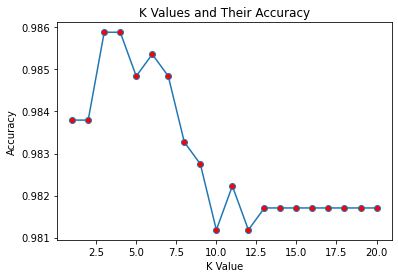

In [19]:
plt.plot(range(1, 21), acc, marker = "o", markerfacecolor = "red")
plt.title("K Values and Their Accuracy")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
print("Max accuracy of {} occurs at K = {}".format(max(acc), acc.index(max(acc))))

In [20]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [21]:
cv = cross_val_score(knn, train, target)
print(np.mean(cv))

0.9810488253651123


In [22]:
cv

array([0.97648596, 0.98169935, 0.98169935, 0.98431373, 0.98104575])

### Dropping Flags

In [36]:
dropCols = rawData.filter(regex="flag").columns
dropCols

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec'], dtype='object')

In [37]:
X_new = X.drop(dropCols, axis = 1)
X_new

,koi_score,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1.088639,-0.049588,0.064131,-0.175923,-0.411686,-0.281819,-0.032699,-0.341451,-0.048067,-0.281610,-0.366652,-0.316037,0.362574,-0.130852,-0.026421,1.202764,0.781300
1,1.023635,-0.015924,-0.054029,-0.044527,-0.172241,-0.278670,-0.032514,-0.750184,-0.048598,-0.294177,1.138156,-0.316037,0.362574,-0.130852,-0.026421,1.202764,0.781300
2,-1.008242,-0.041787,0.142339,0.069847,-0.593305,-0.157985,-0.028690,-0.522461,-0.048408,-0.230716,-0.366652,0.183451,0.540575,-0.140482,1.037397,1.200675,0.845542
3,-1.008242,-0.055395,0.060727,0.161526,-0.496846,-0.191059,-0.022561,0.361570,-0.043052,0.308766,-0.366652,0.123211,0.586809,-0.153049,-1.369071,1.242630,0.961756
4,1.088639,-0.054804,0.079692,-0.010185,-0.613039,-0.281977,-0.032540,0.374416,-0.042838,-0.275201,-0.366652,0.406841,0.295535,-0.111429,-0.693454,1.226243,0.898236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,-1.008242,-0.050261,-0.503084,0.008927,-0.126036,-0.288243,-0.033073,-0.182629,-0.047547,-0.316042,-0.366652,-0.086373,-0.032726,-0.104574,1.403373,0.878331,0.154033
9560,-1.008242,-0.056301,-0.507663,0.154359,-0.370797,-0.270097,-0.023897,1.170862,-0.020385,0.243043,-0.366652,-0.086373,0.505899,-0.134769,1.075986,0.911785,-0.131810
9561,0.033908,-0.055393,-0.488578,-0.206682,-0.387502,-0.288720,-0.033200,0.610313,-0.038694,-0.313278,-0.366652,0.517281,0.309405,-0.113878,-1.164565,0.931057,0.355423
9562,-0.964207,-0.056186,-0.500645,-0.175625,-0.735041,-0.288045,-0.033086,1.322677,-0.012766,-0.311141,-0.366652,0.585050,0.316340,-0.112246,0.441575,0.934684,0.808729


In [38]:
train, test, target, target_test = train_test_split(X_new, y, test_size=0.2, random_state=0) # 80% training, 20% test

In [39]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(train, target)

KNeighborsClassifier(n_neighbors=12)

In [40]:
knn_pred = knn.predict(test)
metrics.accuracy_score(target_test, knn_pred)

0.9257710402509148

In [41]:
acc = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train, target)
    knn_pred = knn.predict(test)
    accuracy = metrics.accuracy_score(target_test, knn_pred)
    acc.append(accuracy)
    print(accuracy)

0.9153162571876634
0.894929430214323
0.9174072138003136
0.909566126502875
0.9236800836382645
0.9168844746471511
0.9262937794040773
0.9158389963408259
0.9252483010977522
0.9236800836382645
0.9252483010977522
0.9257710402509148
0.9289074751698903
0.9242028227914271
0.9273392577104025
0.9226346053319394
0.9242028227914271
0.9215891270256142
0.9262937794040773
0.9221118661787768


Max accuracy of 0.9289074751698903 occurs at K = 12


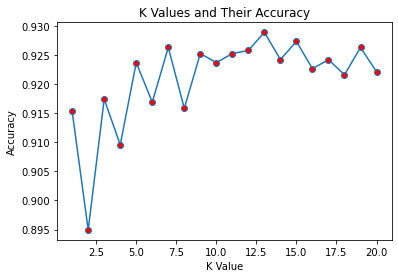

In [43]:
plt.plot(range(1, 21), acc, marker = "o", markerfacecolor = "red")
plt.title("K Values and Their Accuracy")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
print("Max accuracy of {} occurs at K = {}".format(max(acc), acc.index(max(acc))))

In [44]:
cv = cross_val_score(knn, train, target)
print(np.mean(cv))

0.922233492569682


In [45]:
cv

array([0.91378184, 0.92941176, 0.92614379, 0.92222222, 0.91960784])

In [51]:
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

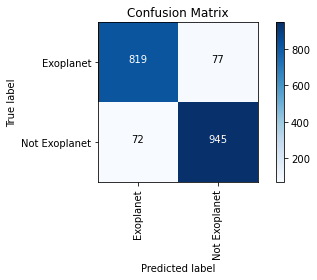

In [52]:
draw_confusion_matrix(target_test, knn_pred, ['Exoplanet', 'Not Exoplanet'])